## SECOND ASSIGNMENT
-KIRABO GLORIA-2022/HD07/2043U
-KIMERA REAGAN-2022

In [1]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Importing numpy and pandas
import numpy as np
import pandas as pd

# Importing data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns


# Importing algorithms that i will use for the training
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import  cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
##Reading in the dataset
import pandas as pd
disease = pd.read_csv("disease_data.csv.csv")
disease.head(10)


PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   
5      16774   64  Female       Heterosexual      Asian      72     161  27.8   
6      76208   30    Male         Homosexual     Others      67     187  19.2   
7      94625   44  Female         Homosexual  Caucasian      45     175  14.7   
8      37405   77    Male         Homosexual   Hispanic      88     210  20.0   
9      59690   96  Female       Heterosexual    African      93     176  30.0   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   
4      0      1  ...          0                  1           1            0   
5      0      0  ...          0                  1           0            0   
6      1      1  ...          0                  1           1            0   
7      1      0  ...          1                  1           0            0   
8      1      1  ...          0                  0           1            0   
9      0      1  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   
5                   0         1                      1       1   
6                   1         1                      0       0   
7                   1         0                      0       0   
8                   0         1                      0       1   
9                   0         0                      0       1   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  
5                    0   Healthy  
6                    0  Diabetes  
7                    1  Diabetes  
8                    1  Covid-19  
9                    0  Diabetes  

[10 rows x 61 columns]

### SUMMARY OF THE DATA

The data contains several signs and sysmptoms that were recorded for diseases including Covid, Diabetes, Malaria and in Healthy patients.
The age, height,gender, race and patient ID for each patient are also recorded.
 

## EXPLORATORY DATA ANALYSIS

The first step is to determine the EDA which is more of a survey through my data to identify datashape, structure, checking for missing values and duplicates, determing distribution of my data.

-The EDA informs my decisions for data preprocessing.

In [3]:
##Finding columns and rows of the dataset of the dataset

disease.shape
print("The rows and columns in the dataset dataset are :",disease.shape)

The rows and columns in the dataset dataset are : (10000, 61)


In [4]:
## Determing the general over view of the dataset

disease.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Sexual_Orientation     10000 non-null  object 
 4   Race                   10000 non-null  object 
 5   Weight                 10000 non-null  int64  
 6   Height                 10000 non-null  int64  
 7   BMI                    10000 non-null  float64
 8   Label                  10000 non-null  int64  
 9   Fever                  10000 non-null  int64  
 10  Cough                  10000 non-null  int64  
 11  Fatigue                10000 non-null  int64  
 12  BodyAche               10000 non-null  int64  
 13  LossOfTaste            10000 non-null  int64  
 14  Sweating               10000 non-null  int64  
 15  Hea

In [5]:
##Checking for duplicates in the data

duplicates = disease[disease.duplicated()]
duplicates

Empty DataFrame
Columns: [PatientID, Age, Gender, Sexual_Orientation, Race, Weight, Height, BMI, Label, Fever, Cough, Fatigue, BodyAche, LossOfTaste, Sweating, Headache, Nausea, Diarrhea, LossOfAppetite, ShortnessOfBreath, ChestPain, FrequentUrination, ExcessiveThirst, WeightLoss, BlurredVision, Chills, SoreThroat, Confusion, Dizziness, Rash, JointPain, StiffNeck, Seizures, SensitivityToLight, MoodSwings, NeckPain, MuscleWeakness, LossOfSmell, Insomnia, HearingLoss, EarAche, NightSweats, SkinRash, Wheezing, YellowSkin, PinkEye, EyePain, IncreasedAppetite, DecreasedAppetite, NasalCongestion, RunnyNose, SinusPain, SwollenLymphNodes, MemoryLoss, Dehydration, IncreasedUrination, DryMouth, TinglingInHandsOrFeet, RedEye, LossOfConsciousness, Disease]
Index: []

[0 rows x 61 columns]

In [6]:
##Checking for missing values

miss_disease = disease.isna().sum()
print(f"missing values :{miss_disease[miss_disease > 0]}")

missing values :Series([], dtype: int64)


In [7]:
##Generating Descriptive statistics of all numeric columns in the dataset

disease.describe().T

count         mean           std    min      25%  \
PatientID              10000.0  49903.77160  28948.676218    5.0  24647.5   
Age                    10000.0     57.86830     24.669317   15.0     37.0   
Weight                 10000.0     79.70340     23.349817   40.0     59.0   
Height                 10000.0    174.87370     20.335228  140.0    157.0   
BMI                    10000.0     27.16025     10.374548    9.1     19.2   
Label                  10000.0      0.49970      0.500025    0.0      0.0   
Fever                  10000.0      0.50310      0.500015    0.0      0.0   
Cough                  10000.0      0.49850      0.500023    0.0      0.0   
Fatigue                10000.0      0.49220      0.499964    0.0      0.0   
BodyAche               10000.0      0.48950      0.499915    0.0      0.0   
LossOfTaste            10000.0      0.49840      0.500022    0.0      0.0   
Sweating               10000.0      0.49840      0.500022    0.0      0.0   
Headache               10000.0      0.49320      0.499979    0.0      0.0   
Nausea                 10000.0      0.51210      0.499879    0.0      0.0   
Diarrhea               10000.0      0.49290      0.499975    0.0      0.0   
LossOfAppetite         10000.0      0.50410      0.500008    0.0      0.0   
ShortnessOfBreath      10000.0      0.49900      0.500024    0.0      0.0   
ChestPain              10000.0      0.49350      0.499983    0.0      0.0   
FrequentUrination      10000.0      0.50860      0.499951    0.0      0.0   
ExcessiveThirst        10000.0      0.49480      0.499998    0.0      0.0   
WeightLoss             10000.0      0.49510      0.500001    0.0      0.0   
BlurredVision          10000.0      0.50240      0.500019    0.0      0.0   
Chills                 10000.0      0.49860      0.500023    0.0      0.0   
SoreThroat             10000.0      0.49240      0.499967    0.0      0.0   
Confusion              10000.0      0.49890      0.500024    0.0      0.0   
Dizziness              10000.0      0.49790      0.500021    0.0      0.0   
Rash                   10000.0      0.49830      0.500022    0.0      0.0   
JointPain              10000.0      0.50180      0.500022    0.0      0.0   
StiffNeck              10000.0      0.50410      0.500008    0.0      0.0   
Seizures               10000.0      0.50870      0.499949    0.0      0.0   
SensitivityToLight     10000.0      0.50400      0.500009    0.0      0.0   
MoodSwings             10000.0      0.50410      0.500008    0.0      0.0   
NeckPain               10000.0      0.49480      0.499998    0.0      0.0   
MuscleWeakness         10000.0      0.50270      0.500018    0.0      0.0   
LossOfSmell            10000.0      0.49790      0.500021    0.0      0.0   
Insomnia               10000.0      0.50600      0.499989    0.0      0.0   
HearingLoss            10000.0      0.50050      0.500025    0.0      0.0   
EarAche                10000.0      0.49880      0.500024    0.0      0.0   
NightSweats            10000.0      0.51030      0.499919    0.0      0.0   
SkinRash               10000.0      0.50120      0.500024    0.0      0.0   
Wheezing               10000.0      0.49760      0.500019    0.0      0.0   
YellowSkin             10000.0      0.50530      0.499997    0.0      0.0   
PinkEye                10000.0      0.50430      0.500007    0.0      0.0   
EyePain                10000.0      0.50450      0.500005    0.0      0.0   
IncreasedAppetite      10000.0      0.49490      0.499999    0.0      0.0   
DecreasedAppetite      10000.0      0.50490      0.500001    0.0      0.0   
NasalCongestion        10000.0      0.49550      0.500005    0.0      0.0   
RunnyNose              10000.0      0.50370      0.500011    0.0      0.0   
SinusPain              10000.0      0.50220      0.500020    0.0      0.0   
SwollenLymphNodes      10000.0      0.49630      0.500011    0.0      0.0   
MemoryLoss             10000.0      0.50430      0.500007    0.0      0.0   
Dehydration          

In [8]:
##Making a copy of the dataset
disease_copy = disease.copy()
disease_copy.head(10)

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   
5      16774   64  Female       Heterosexual      Asian      72     161  27.8   
6      76208   30    Male         Homosexual     Others      67     187  19.2   
7      94625   44  Female         Homosexual  Caucasian      45     175  14.7   
8      37405   77    Male         Homosexual   Hispanic      88     210  20.0   
9      59690   96  Female       Heterosexual    African      93     176  30.0   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   
4      0      1  ...          0                  1           1            0   
5      0      0  ...          0                  1           0            0   
6      1      1  ...          0                  1           1            0   
7      1      0  ...          1                  1           0            0   
8      1      1  ...          0                  0           1            0   
9      0      1  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   
5                   0         1                      1       1   
6                   1         1                      0       0   
7                   1         0                      0       0   
8                   0         1                      0       1   
9                   0         0                      0       1   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  
5                    0   Healthy  
6                    0  Diabetes  
7                    1  Diabetes  
8                    1  Covid-19  
9                    0  Diabetes  

[10 rows x 61 columns]

In [11]:
##Generating a pandas profiling report

import ydata_profiling as ypf

Profile = ypf.ProfileReport(disease)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

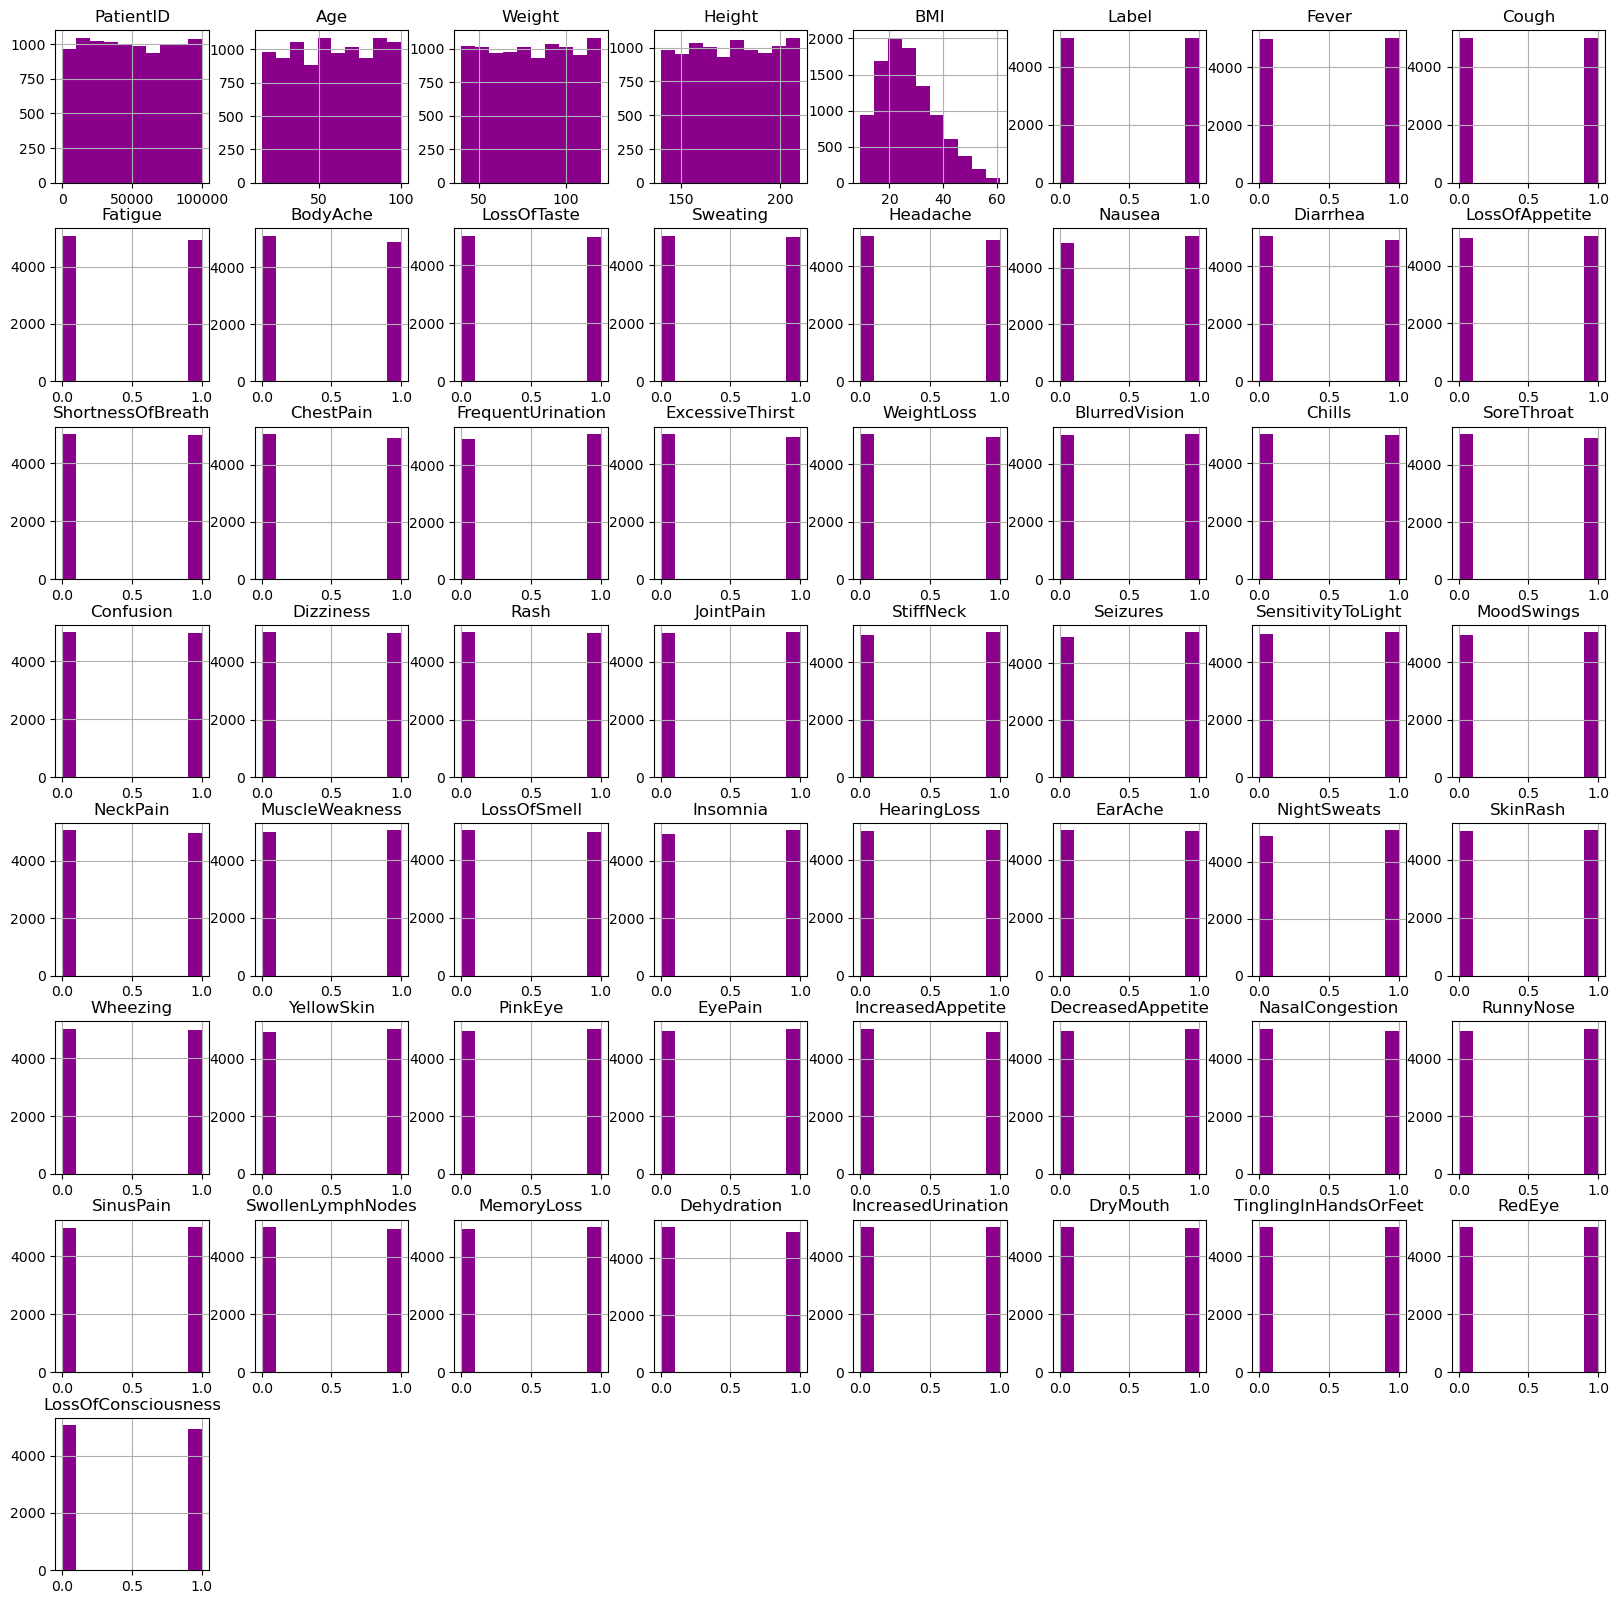

In [10]:
##Histogram showing frequency univariate distribution

data_hist_plot = disease.hist(figsize=(20,20), color= "#8B008B")

## Summary of the histograms above

-From the histograms shown above, we observed that most of the data in most features is evenly distributed except in the BMI column.
  

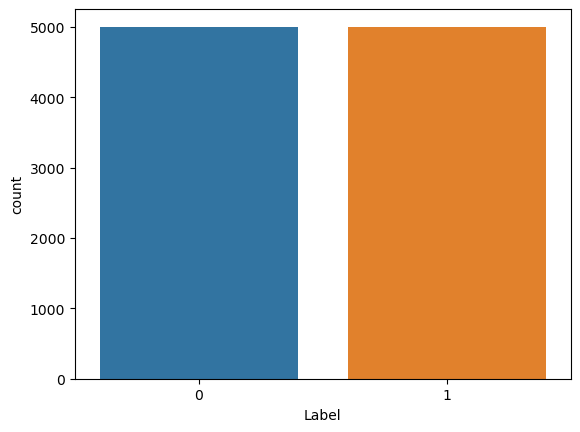

In [12]:
##Finding the distribution of the data in the target column

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x = 'Label', data = disease)
plt.show()

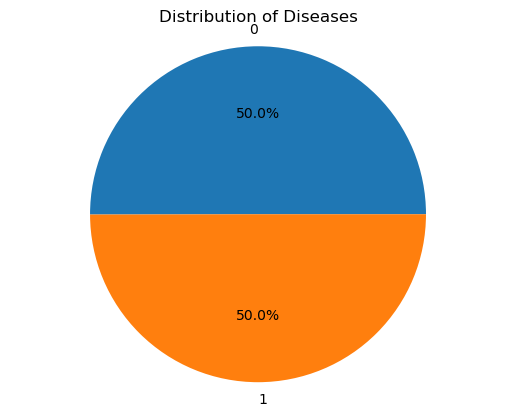

In [13]:
##Visualizing the distribution in our target olumn using a pie chart

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Count the occurrences of each disease
disease_counts = disease['Label'].value_counts()

# Create a pie chart
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Diseases')
plt.show()


In [14]:
##Identifying the 10 columns with the highest correlation with our querry column Disease which is encoded in Label column
import pandas as pd
import seaborn as sns


numeric_columns = disease.select_dtypes(include='number')
numeric_corr = numeric_columns.corr()
disease_corr = numeric_corr['Label'].sort_values(ascending=False).head(20).to_frame()
cmap = sns.light_palette("#8B008B", as_cmap=True)
style = disease_corr.style.background_gradient(cmap=cmap)

style


-The heatmap showing correlation of all columns was very messy because the dataset is very large.
-We went ahead to determine the top 20 columns with the highest correlation to our querry column Disease.

In [15]:
##Printing out encoded data
import pandas as pd
categorical_cols = ['Gender','Sexual_Orientation','Race']
features_encoded = pd.get_dummies(disease, columns=categorical_cols)

##printing the first few rows of the encoded features

print("Encoded features:")
print(features_encoded.head())

Encoded features:
   PatientID  Age  Weight  Height   BMI  Label  Fever  Cough  Fatigue  \
0      33216   72     112     156  46.0      1      0      0        0   
1      89319   45      40     190  11.1      1      1      0        1   
2      48170   44     112     209  25.6      0      0      1        0   
3      83430   40      83     195  21.8      1      0      0        1   
4      67143   81      83     144  40.0      0      1      0        0   

   BodyAche  ...  Sexual_Orientation_Asexual  Sexual_Orientation_Bisexual  \
0         0  ...                           0                            0   
1         1  ...                           0                            0   
2         0  ...                           0                            0   
3         0  ...                           0                            0   
4         0  ...                           1                            0   

   Sexual_Orientation_Heterosexual  Sexual_Orientation_Homosexual  \
0          

## Data preprocessing

-This step comes in with cleaning our data , however, we didnot observe any missing values, no duplicates were seen.
-Our Pandas profiling report showed high correlation between BMI and Height with weight, but we have not removed the columns.
-Patient ID was also flagged as unique values but we have also left the column there because it may carry additional information not known to us.

## Encoding of strings
-Encoding refers to the process of transforming categorical or textual data into a numerical format that can be effectively utilized by machine learning algorithms or other computational methods. Encoding is necessary because many machine learning algorithms and statistical techniques require numerical inputs.
-We encoded columns of Gender, Sexual Orientation, Race

## The next step is preparing our data for training .

In [16]:
## Dropping the Disease column and the Label column
X = disease.drop('Label', axis=1)
X.head()


PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   

   Fever  Cough  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      0      0  ...          1                  1           0            0   
1      1      0  ...          1                  0           0            1   
2      0      1  ...          1                  1           0            0   
3      0      0  ...          0                  1           1            1   
4      1      0  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  

[5 rows x 60 columns]

In [17]:
##Setting y as the Label column which is our target column
y = disease['Label']
y.head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    1
8    1
9    0
Name: Label, dtype: int64

In [18]:
##Encoding categorical columns in the X dataset

# We performed one-hot encoding
X1 = pd.get_dummies(disease, columns=['Gender', 'Sexual_Orientation', 'Race',"Disease"])
X1


PatientID  Age  Weight  Height   BMI  Label  Fever  Cough  Fatigue  \
0         33216   72     112     156  46.0      1      0      0        0   
1         89319   45      40     190  11.1      1      1      0        1   
2         48170   44     112     209  25.6      0      0      1        0   
3         83430   40      83     195  21.8      1      0      0        1   
4         67143   81      83     144  40.0      0      1      0        0   
...         ...  ...     ...     ...   ...    ...    ...    ...      ...   
9995      19615   30      46     145  21.9      0      0      0        1   
9996      84552   74     114     188  32.3      0      1      1        1   
9997      85999   22      42     208   9.7      0      1      0        1   
9998      50009   22      84     170  29.1      0      0      0        1   
9999      92568   90      90     204  21.6      1      1      1        1   

      BodyAche  ...  Race_African  Race_Asian  Race_Caucasian  Race_Hispanic  \
0            0  ...             0           0               0              0   
1            1  ...             0           0               1              0   
2            0  ...             1           0               0              0   
3            0  ...             0           0               0              1   
4            0  ...             1           0               0              0   
...        ...  ...           ...         ...             ...            ...   
9995         0  ...             1           0               0              0   
9996         1  ...             0           0               0              1   
9997         1  ...             0           0               1              0   
9998         1  ...             0           0               1              0   
9999         1  ...             0           1               0              0   

      Race_Others  Disease_Covid-19  Disease_Diabetes  Disease_HIV  \
0               1                 0                 0            0   
1               0                 1                 0            0   
2               0                 0                 0            0   
3               0                 0                 1            0   
4               0                 1                 0            0   
...           ...               ...               ...          ...   
9995            0                 0                 0            1   
9996            0                 0                 0            1   
9997            0                 0                 1            0   
9998            0                 0                 0            0   
9999            0                 1                 0            0   

      Disease_Healthy  Disease_Malaria  
0                   1                0  
1                   0                0  
2                   0                1  
3                   0                0  
4                   0                0  
...               ...              ...  
9995                0                0  
9996                0                0  
9997                0                0  
9998                0                1  
9999                0                0  

[10000 rows x 74 columns]

## Determining the metric to be used during training
-We chose the accuracy metric for evaluation of the models.

##The next step is splitting our dataset into training and test datasets

In [19]:


## Importing train_test_split(splitting the dataset into training 80% and testing 20%)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42, stratify = y)

##Determining the shape of the created train_test_split data

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


##Viewing the first 10 rows of the split training set

X_train.head(10)



(8000, 74) (2000, 74) (8000,) (2000,)


PatientID  Age  Weight  Height   BMI  Label  Fever  Cough  Fatigue  \
3544      31995   86      43     205  10.2      0      0      1        1   
3711      66055   40      53     182  16.0      1      1      0        1   
1147      39089   89      97     163  36.5      0      0      1        0   
9834      56809   27      97     198  24.7      0      1      1        0   
360       87278   30     104     153  44.4      0      0      1        0   
3002      86308   80      80     201  19.8      0      1      1        0   
8057      47076   98      86     152  37.2      0      1      1        1   
7717      15707   29     110     171  37.6      1      0      0        0   
520       74178   77      75     148  34.2      0      0      0        0   
8643      41277   64     101     200  25.2      1      1      1        0   

      BodyAche  ...  Race_African  Race_Asian  Race_Caucasian  Race_Hispanic  \
3544         1  ...             1           0               0              0   
3711         0  ...             0           0               0              0   
1147         0  ...             0           0               0              1   
9834         0  ...             0           1               0              0   
360          1  ...             0           0               0              0   
3002         1  ...             0           0               0              1   
8057         1  ...             0           0               0              1   
7717         1  ...             0           0               0              1   
520          0  ...             0           0               1              0   
8643         1  ...             0           0               0              1   

      Race_Others  Disease_Covid-19  Disease_Diabetes  Disease_HIV  \
3544            0                 0                 0            0   
3711            1                 1                 0            0   
1147            0                 0                 1            0   
9834            0                 0                 0            1   
360             1                 1                 0            0   
3002            0                 0                 0            1   
8057            0                 0                 1            0   
7717            0                 0                 1            0   
520             0                 0                 1            0   
8643            0                 0                 0            0   

      Disease_Healthy  Disease_Malaria  
3544                0                1  
3711                0                0  
1147                0                0  
9834                0                0  
360                 0                0  
3002                0                0  
8057                0                0  
7717                0                0  
520                 0                0  
8643                0                1  

[10 rows x 74 columns]

-Training of models to determine the best performing model 

In [20]:
##LOGISTIC REGRESSION MODEL


# This step creates the logistic regression model(we set maximum iterations to 1000)
logistic_reg = LogisticRegression(max_iter=1000)

# This step trains the logistic regression model on the training set
logistic_reg.fit(X_train, y_train)


#  We then calculate the training accuracy score
y_train_pred = logistic_reg.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# This is then followed by making predictions on the test set
y_pred = logistic_reg.predict(X_test)

# We then calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'The training set accuracy score for LG is {training_accuracy:.2f}')
print(f'The test set accuracy score for LG is {accuracy:.2f}')

The training set accuracy score for LG is 0.50
The test set accuracy score for LG is 0.50


###The results from the above training show us that we have low training and test accuracy
-Some of the ways we can improve this problem is by feature engineering,datapreprocessing,scaling among others.
- We started with standardizing the columns with age, patient id,weight,height,BMI so that we provide the model with uniform range of data.

In [21]:
##Standardizing our target columns mentioned above in the X1 dataset
from sklearn.preprocessing import StandardScaler

# Selecting the columns to be scaled
columns_to_scale = ['PatientID','Age','Weight','Height','BMI']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X1[columns_to_scale] = scaler.fit_transform(X1[columns_to_scale])
X1.head()


PatientID       Age    Weight    Height       BMI  Label  Fever  Cough  \
0  -0.576489  0.572874  1.383232 -0.928175  1.816049      1      0      0   
1   1.361624 -0.521658 -1.700458  0.743884 -1.548121      1      1      0   
2  -0.059894 -0.562196  1.383232  1.678270 -0.150400      0      0      1   
3   1.158184 -0.724349  0.141190  0.989775 -0.516699      1      0      0   
4   0.595540  0.937718  0.141190 -1.518313  1.237682      0      1      0   

   Fatigue  BodyAche  ...  Race_African  Race_Asian  Race_Caucasian  \
0        0         0  ...             0           0               0   
1        1         1  ...             0           0               1   
2        0         0  ...             1           0               0   
3        1         0  ...             0           0               0   
4        0         0  ...             1           0               0   

   Race_Hispanic  Race_Others  Disease_Covid-19  Disease_Diabetes  \
0              0            1                 0                 0   
1              0            0                 1                 0   
2              0            0                 0                 0   
3              1            0                 0                 1   
4              0            0                 1                 0   

   Disease_HIV  Disease_Healthy  Disease_Malaria  
0            0                1                0  
1            0                0                0  
2            0                0                1  
3            0                0                0  
4            0                0                0  

[5 rows x 74 columns]

In [22]:
##Splitting our X1 data again
# Importing train_test_split(splitting the dataset into training 80% and testing 20%)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42, stratify = y)

##Determining the shape of the created train_test_split data

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


##Viewing the first 10 rows of the split training set

X_train.head(10)



(8000, 74) (2000, 74) (8000,) (2000,)


PatientID       Age    Weight    Height       BMI  Label  Fever  Cough  \
3544  -0.618670  1.140409 -1.571971  1.481557 -1.634876      0      0      1   
3711   0.557954 -0.724349 -1.143681  0.350459 -1.075787      1      1      0   
1147  -0.373603  1.262023  0.740797 -0.583927  0.900301      0      0      1   
9834   0.238545 -1.251346  0.740797  1.137310 -0.237155      0      1      1   
360    1.291116 -1.129731  1.040600 -1.075709  1.661818      0      0      1   
3002   1.257607  0.897180  0.012703  1.284845 -0.709488      0      1      1   
8057  -0.097687  1.626867  0.269677 -1.124887  0.967777      0      1      1   
7717  -1.181349 -1.170269  1.297574 -0.190502  1.006335      1      0      0   
520    0.838568  0.775565 -0.201442 -1.321600  0.678594      0      0      0   
8643  -0.298017  0.248568  0.912113  1.235666 -0.188957      1      1      1   

      Fatigue  BodyAche  ...  Race_African  Race_Asian  Race_Caucasian  \
3544        1         1  ...             1           0               0   
3711        1         0  ...             0           0               0   
1147        0         0  ...             0           0               0   
9834        0         0  ...             0           1               0   
360         0         1  ...             0           0               0   
3002        0         1  ...             0           0               0   
8057        1         1  ...             0           0               0   
7717        0         1  ...             0           0               0   
520         0         0  ...             0           0               1   
8643        0         1  ...             0           0               0   

      Race_Hispanic  Race_Others  Disease_Covid-19  Disease_Diabetes  \
3544              0            0                 0                 0   
3711              0            1                 1                 0   
1147              1            0                 0                 1   
9834              0            0                 0                 0   
360               0            1                 1                 0   
3002              1            0                 0                 0   
8057              1            0                 0                 1   
7717              1            0                 0                 1   
520               0            0                 0                 1   
8643              1            0                 0                 0   

      Disease_HIV  Disease_Healthy  Disease_Malaria  
3544            0                0                1  
3711            0                0                0  
1147            0                0                0  
9834            1                0                0  
360             0                0                0  
3002            1                0                0  
8057            0                0                0  
7717            0                0                0  
520             0                0                0  
8643            0                0                1  

[10 rows x 74 columns]

In [23]:
## TRAINING OUR LOGISTIC REGRESSION MODEL


# This step creates the logistic regression model(we set maximum iterations to 1000)
logistic_reg = LogisticRegression(max_iter=1000)

# This step trains the logistic regression model on the training set
logistic_reg.fit(X_train, y_train)


#  We then calculate the training accuracy score
y_train_pred = logistic_reg.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# This is then followed by making predictions on the test set
y_pred = logistic_reg.predict(X_test)

# We then calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'The training set accuracy score for LG is {training_accuracy:.2f}')
print(f'The test set accuracy score for LG is {accuracy:.2f}')

The training set accuracy score for LG is 1.00
The test set accuracy score for LG is 1.00


###From the result above we observed that our model has again overfitted, so we decided to split the data into 50% by 50% for training and testing with the scaled dataset and we see how it performs.

In [24]:
##Splitting the data by 50% train and 50% test datasets.
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y, test_size = 0.5, random_state = 42, stratify = y)

##Determining the shape of the created train_test_split data

print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)



(5000, 74) (5000, 74) (5000,) (5000,)


In [25]:
## Trainingour logistic regression model again 

logistic_reg = LogisticRegression(max_iter=1000)

logistic_reg.fit(X2_train, y2_train)


#  We then calculate the training accuracy score
y_train_pred = logistic_reg.predict(X2_train)
training_accuracy = accuracy_score(y2_train, y_train_pred)

# This is then followed by making predictions on the test set
y_pred = logistic_reg.predict(X2_test)

# We then calculate the test set accuracy score
accuracy = accuracy_score(y2_test, y_pred)

print(f'The training set accuracy score for LG is {training_accuracy:.2f}')
print(f'The test set accuracy score for LG is {accuracy:.2f}')


The training set accuracy score for LG is 1.00
The test set accuracy score for LG is 1.00


###The model is still overfitting.
this is where we are moving forward from to find better ways of presenting our data to the models for better training.

##Moving on , we decided to introduce a cross validation set, to see how well the LG model works with unsen data.
Here also, we are now using F1 score as an evaluation metric.
-Using F1 score also informs us about the bias-variance trade off of each model.
- We are splitting the data using the previously standardized data of X1,y.

In [29]:
##Providing a crossvalidation set to evaluate the Logistic regression model.

from sklearn.metrics import f1_score, make_scorer


# Split the dataset into training (60%), cross-validation (20%), and testing (20%) sets
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the logistic regression model on the training set
log_reg.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(log_reg, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = log_reg.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')

Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [31]:
####Providing a crossvalidation set to evaluate the KNN ALGORITHM

# Create the logistic regression model
knn = KNeighborsClassifier()

# Train the KNeighborsClassifier model on the training set
knn.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(knn, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = knn.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')

Training Set F1 Score: 0.90
Cross-Validation F1 Scores: [0.77389277 0.75       0.77884615 0.74004684 0.77909739]
Average Cross-Validation F1 Score: 0.76
Test Set F1 Score: 0.79


In [32]:
###Providing a crossvalidation set to evaluate the Gradient Boosting Algorithm

gbc = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbc.fit(X_train, y_train)
# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(gbc, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = gbc.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')

Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [33]:
###Providing a crossvalidation set to evaluate the SUPPORT VECTOR MACHINE


svm = SVC(kernel='rbf')

# Train the SVM model on the training set
svm.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(svm, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = svm.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')


Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [34]:
###Providing a crossvalidation set to evaluate the naive bayes algorithm

nb = GaussianNB()

# Train the Naive Bayes model on the training set
nb.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(nb, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = nb.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')



Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [35]:
###Providing a crossvalidation set to evaluate the adaboost algorithm
# Create the AdaBoostClassifier model
adb = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the AdaBoostClassifier model on the training set
adb.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(adb, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = adb.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = adb.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')



Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [36]:
###Providing a crossvalidation set to evaluate the random forest algorithm
# Create the Random Forest Classifier model
rfm = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier model on the training set
rfm.fit(X_train, y_train)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation on the cross-validation set
cv_scores = cross_val_score(rfm, X_cv, y_cv, cv=5, scoring=f1_scorer)

# Calculate the training F1 score
y_train_pred = rfm.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = rfm.predict(X_test)

# Calculate the test set F1 score
f1 = f1_score(y_test, y_pred)

print(f'Training Set F1 Score: {train_f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')



Training Set F1 Score: 1.00
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation F1 Score: 1.00
Test Set F1 Score: 1.00


In [37]:
##Determining the Best Model using the train test

res_obtained = pd.DataFrame({
                        "Model": ["LogisticRegression",
                                  "KNN",
                                  "Random Forest",
                                  "AdaBoostClassifier",
                                  "Naive Bayes",
                                  "Support Vector Machine",
                                  "Gradient Boosting Classifier"],
                        "Score": [logistic_reg.score(X_train, y_train),
                                  knn.score(X_train, y_train),
                                  rfm.score(X_train, y_train),
                                  adb.score(X_train, y_train),
                                  nb.score(X_train, y_train),
                                  svm.score(X_train, y_train),
                                  gbc.score(X_train, y_train)]
                        })
res_obtained_df = res_obtained.sort_values(by="Score", ascending=False)
res_obtained_df= res_obtained_df.set_index("Score")
res_obtained_df

Model
Score                                 
1.000000            LogisticRegression
1.000000                 Random Forest
1.000000            AdaBoostClassifier
1.000000                   Naive Bayes
1.000000        Support Vector Machine
1.000000  Gradient Boosting Classifier
0.899167                           KNN

In [38]:
##Determining the best model using cross-validation scores
res_obtained = pd.DataFrame({
                        "Model": ["LogisticRegression",
                                  "KNN",
                                  "Random Forest",
                                  "AdaBoostClassifier",
                                  "Naive Bayes",
                                  "Support Vector Machine",
                                  "Gradient Boosting Classifier"],
                        "Score": [logistic_reg.score(X_cv, y_cv),
                                  knn.score(X_cv, y_cv),
                                  rfm.score(X_cv, y_cv),
                                  adb.score(X_cv, y_cv),
                                  nb.score(X_cv, y_cv),
                                  svm.score(X_cv, y_cv),
                                  gbc.score(X_cv, y_cv)]
                        })
res_obtained_df = res_obtained.sort_values(by="Score", ascending=False)
res_obtained_df= res_obtained_df.set_index("Score")
res_obtained_df

Model
Score                              
1.000            LogisticRegression
1.000                 Random Forest
1.000            AdaBoostClassifier
1.000                   Naive Bayes
1.000        Support Vector Machine
1.000  Gradient Boosting Classifier
0.802                           KNN